# Andres Graterol - 4031393 - Fall 22
# Homework 3 Question 1

## Basis Functions

In [6]:
# Import our libraries
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Constructing uniformly spaced centers based on:
# input data and the degree of complexity 
def construct_centers(input_data, degree):
    centers_list = []
    
    # dependent on input being between 0 and 1
    maximum = 0
    for x in input_data:
        if (x > maximum):
            maximum = x
            
    minimum = 1
    for x in input_data:
        if (x < minimum):
            minimum = x
    
    x_max = maximum        
    x_min = minimum
    
    spacing = (x_max - x_min) / degree

    # Find the center for each portion and add them to the list
    for i in range(degree):
        centers_list.append(spacing * (i+1))
        
    return centers_list

def compute_design_matrix(centers, input_data, degree):
    # Set s, the width parameters of the gaussians
    s = 2*(centers[1] - centers[0])
    
    # Will hold the final design matrix 
    design_matrix = []
    
    # Each data point will make up a row in the
    # design matrix
    for point in input_data:
        row_array = []
        
        for m in range(degree):
            numerator = (point-centers[m])**2 
            denominator = 2*(s**2)
            
            # calculate phi of j
            phi = np.exp(-(numerator/denominator))
            #print(f"phi of {m} for {point}:", phi)
            
            # add it to the current row array 
            row_array.append(phi)
            
        # add the row to the design matrix
        design_matrix.append(row_array)
        
    return design_matrix

## Training the model

In [9]:
def compute_optimal_weights(design_matrix, true_values):
    # phi^T phi
    temp = np.matmul(np.transpose(design_matrix), design_matrix)
    
    # (phi^T phi)^-1 phi^T
    psuedo_inverse = np.matmul(np.linalg.inv(temp), np.transpose(design_matrix))
    
    w_star = np.matmul(psuedo_inverse, true_values)
    
    return w_star

def learned_model(design_matrix, optimal_weights):
    # y(x,w) = phi x w
    learned_model = np.matmul(design_matrix, optimal_weights)
    return learned_model

In [11]:
N = 25
M = 20
# 25 points between 0 and 1 
input_data = np.linspace(0, 1, N)
#print("Shape: ", input_data.shape)
#print("Input Data:", input_data)

# Obtaining true values by applying noise to the sine of the input data
true_values_list = []
sine = []

for x in input_data:
    # model
    sine.append(np.sin(2*np.pi*x))
    gaussian_noise = np.random.normal(loc = 0, scale = 0.2)
    true_values_list.append(np.sin(2*np.pi*x) + gaussian_noise)
     
true_values = np.array(true_values_list)
#print("Shape of true values before", true_values.shape)
true_values = true_values[: , np.newaxis]
#print("Shape of true values after", true_values.shape)

# First find the 20 centers to compute the design matrix
centers = construct_centers(input_data, M)
#print("Centers for our data:", centers)

# Find the design matrix at the input_data
design_matrix_list = compute_design_matrix(centers, input_data, M)
#print("Design Matrix:", design_matrix)
design_matrix = np.array(design_matrix_list)
#print("Shape of Design matrix:", design_matrix.shape)

# Find the optimal weights
optimal_weights = compute_optimal_weights(design_matrix, true_values)
#print("optimal weights:", optimal_weights)
#print("Shape of optimal weights ", optimal_weights.shape)

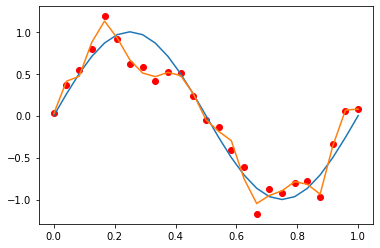

In [12]:
# Model for the training set
learned_model_training = learned_model(design_matrix, optimal_weights)

plt.plot(input_data, sine)
plt.scatter(input_data, true_values, color = 'red')
plt.plot(input_data, learned_model_training)

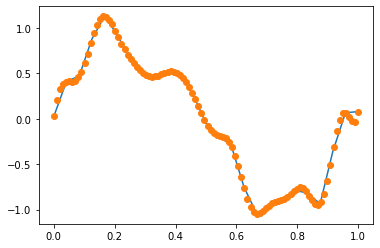

In [16]:
# Model for the testing set 
testing_set = np.linspace(0,1,100)
#testing_set = np.random.uniform(low = 0, high = 1, size = (100,))

testing_design_matrix_list = compute_design_matrix(centers, testing_set, M)

testing_design_matrix = np.array(testing_design_matrix_list)

learned_model_testing = learned_model(testing_design_matrix, optimal_weights)

#print(learned_model_training)
#print("Shape of training model:", learned_model_training.shape)

#print(learned_model_testing)
#print("Shape of learned model:", learned_model_testing.shape)

#print(input_data)
#print("Shape of input data:", input_data.shape)

#print(testing_set)
#print("Shape of testing data:", testing_set.shape)

plt.plot(input_data, learned_model_training, testing_set, learned_model_testing, 'o')

As you can see, the model greatly overfits and hits every point in the testing set

## Bias-Variance Tradeoff

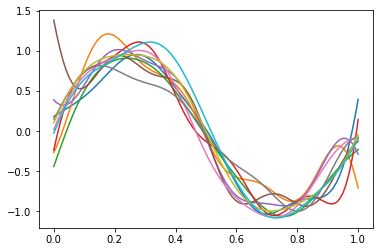

In [17]:
# Generate 10 training sets 
M = 10
N = 25

average_model_list = []

for i in range(10):

    # create the training set values 
    input_data_tradeoff = np.random.uniform(low = 0, high = 1, size = (N,))
    
    true_values_list_tradeoff = []
    
    # Finding the true values by adding gaussian noise to each point 
    for x in input_data_tradeoff:
        gaussian_noise = np.random.normal(loc = 0, scale = 0.2)
        true_values_list_tradeoff.append(np.sin(2*np.pi*x) + gaussian_noise)
    
    true_values_tradeoff = np.array(true_values_list_tradeoff)
    #print("Shape of true values before", true_values_tradeoff.shape)
    true_values_tradeoff = true_values_tradeoff[: , np.newaxis]
    #print("Shape of true values after", true_values_tradeoff.shape)
    #print("True Values:", true_values_tradeoff)

    # Find the center for each training set 
    centers_tradeoff = construct_centers(input_data_tradeoff, M)
    #print("Centers for our data:", centers_tradeoff)

    # Find the design matrix at the input_data for each training set
    design_matrix_list_tradeoff = compute_design_matrix(centers_tradeoff, input_data_tradeoff, M)
    design_matrix_tradeoff = np.array(design_matrix_list_tradeoff)
    #print("Shape of Design matrix:", design_matrix_tradeoff.shape)

    # Find the optimal weights for each training set
    optimal_weights_tradeoff = compute_optimal_weights(design_matrix_tradeoff, true_values_tradeoff)
    #print("optimal weights:", optimal_weights_tradeoff)
    #print("Shape of optimal weights ", optimal_weights_tradeoff.shape)
    
    # NOW THAT THE MODEL (OPTIMAL WEIGHTS) HAS BEEN LEARNED, FEED IN TEST DATA
    testing_design_matrix_list_tradeoff = compute_design_matrix(centers_tradeoff, testing_set, M)

    testing_design_matrix_tradeoff = np.array(testing_design_matrix_list_tradeoff)

    learned_model_testing_tradeoff = learned_model(testing_design_matrix_tradeoff, optimal_weights_tradeoff)
    
    learned_model_testing_tradeoff = np.squeeze(learned_model_testing_tradeoff)
    
    average_model_list.append(learned_model_testing_tradeoff)
    
    plt.plot(testing_set, learned_model_testing_tradeoff)    

# use the model matrix in order to find the average model for plotting
average_model = np.array(average_model_list)
#print(average_model)
#print("Shape of model matrix", average_model.shape)

# Now average each column in order to get new learned model
column_means = average_model.mean(axis=0)
#print("Shape of average matrix:", column_means.shape)

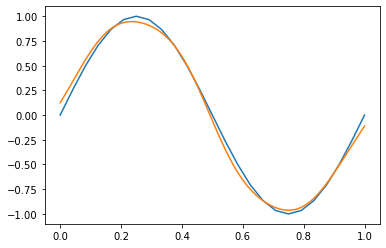

In [18]:
# Plotting the average model vs the true sine model
plt.plot(input_data, sine, testing_set, column_means)

In [19]:
# First let's define a function which will calculate the regularized weights
def compute_gaussian_weights(design_matrix, true_values, l):
    # phi^T phi + lambdaI
    temp = np.matmul(np.transpose(design_matrix), design_matrix)
    #print("Temp", temp.shape)
    
    # (phi^T phi + lambdaI)^-1 phi^T
    psuedo_inverse = np.matmul(np.linalg.inv(temp + l*np.identity(M)), np.transpose(design_matrix))
    
    w_star = np.matmul(psuedo_inverse, true_values)
    
    return w_star

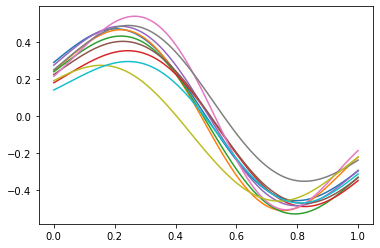

In [20]:
# Now we do the same process with the new regularization
# Generate 10 training sets 
M = 10
N = 25
# Setting regularization term
l = np.exp(3)

average_gaussian_model_list = []

for i in range(10):

    # create the training set values 
    input_data_gaussian = np.random.uniform(low = 0, high = 1, size = (N,))
    
    true_values_list_gaussian = []
    
    # Finding the true values by adding gaussian noise to each point 
    for x in input_data_gaussian:
        gaussian_noise = np.random.normal(loc = 0, scale = 0.2)
        true_values_list_gaussian.append(np.sin(2*np.pi*x) + gaussian_noise)
    
    true_values_gaussian = np.array(true_values_list_gaussian)
    true_values_gaussian = true_values_gaussian[: , np.newaxis]

    # Find the center for each training set 
    centers_gaussian = construct_centers(input_data_gaussian, M)
    
    # Find the design matrix at the input_data for each training set
    design_matrix_list_gaussian = compute_design_matrix(centers_gaussian, input_data_gaussian, M)
    design_matrix_gaussian = np.array(design_matrix_list_gaussian)

    # Find the optimal weights for each training set
    optimal_weights_gaussian = compute_gaussian_weights(design_matrix_gaussian, true_values_gaussian, l)
    
    # NOW THAT THE MODEL (OPTIMAL WEIGHTS) HAS BEEN LEARNED, FEED IN TEST DATA
    testing_design_matrix_list_gaussian = compute_design_matrix(centers_gaussian, testing_set, M)

    testing_design_matrix_gaussian = np.array(testing_design_matrix_list_gaussian)

    learned_model_testing_gaussian = learned_model(testing_design_matrix_gaussian, optimal_weights_gaussian)
    
    learned_model_testing_gaussian = np.squeeze(learned_model_testing_gaussian)
    
    average_gaussian_model_list.append(learned_model_testing_gaussian)
    
    #print("Testing_set shape:", testing_set.shape)
    #print("Model shape:", learned_model_testing_gaussian.shape)
    plt.plot(testing_set, learned_model_testing_gaussian)    

# use the model matrix in order to find the average model for plotting
average_gaussian_model = np.array(average_gaussian_model_list)

# Now average each column in order to get new learned model
gaussian_column_means = average_gaussian_model.mean(axis=0)

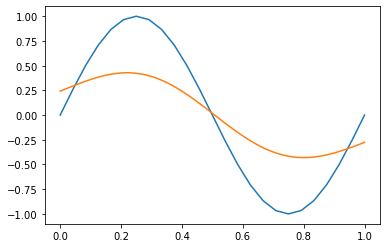

In [267]:
# Plotting the average model vs the true sine model
plt.plot(input_data, sine, testing_set, gaussian_column_means)

## Sequential Learning 

In [21]:
def compute_basis_vector(centers, point, degree):
    s = 2*(centers[1] - centers[0])
    
    basis_vector = []
    
    for m in range(degree):
        numerator = (point-centers[m])**2
        denominator = 2*(s**2)
        
        #calculate phi of j
        phi = np.exp(-(numerator/denominator))
        
        basis_vector.append(phi)
        
    return basis_vector

def compute_error(error_list, iteration):
    # Square all the errors in the list 
    error_list = np.square(error_list)
    
    # Sum all the errors in the list
    error = sum(error_list)
    
    # Get the average error for the current iteration
    average_error = (1/iteration) * error
    
    return average_error

In [30]:
# Implement SGD in order to learn the weights of the model sequentially 
def SGD(N, lr):
    M = 20

    # Generate 500 data points uniformly over the interval [0,1]
    data_points = np.random.uniform(low=0, high=1, size=(N,))
    print(data_points.shape)

    target_values_list = []

    gaussian_noise = np.random.normal(loc = 0, scale = 0.2)

    # Finding the true values by adding gaussian noise to each point
    for x in data_points: 
        target_values_list.append(np.sin(2*np.pi*x) + gaussian_noise)

    target_values = np.array(target_values_list)
    target_values = target_values[: , np.newaxis]
    #print("Targets:", target_values)

    # find the centers
    centers = construct_centers(data_points, M)

    # Create an error list to hold the errors at the current iteration 
    # and find the average error
    error_list = []

    # implement the intial weight vector 
    w0 = np.zeros(M)

    w0 = np.array(w0)
    #print("w0 shape:", w0.shape)

    w_temp = None

    # 1 iteration per data point: 500 iterations 
    for i in range(len(data_points)):
        #if(i == 0):
        #    print(f"Iteration {i}, this step's weights:" , w0)
        #else:
        #    print(f"Iteration {i}, this step's weights:" , w_temp)

        # Plot the error as long as we are past the initialization step 
        if (i > 0):
            average_error = compute_error(error_list, i)
            plt.plot(i, average_error, '-o')

        # Create the phi vector for this data point 
        phi = compute_basis_vector(centers, data_points[i], M)
        #print(f"phi of X{i+1}:", phi)

        # Use initial weight vector if on initialization step
        if(i == 0):
            phi = np.array(phi)
            hold = np.matmul(np.transpose(w0), phi)
            error = target_values[i] - hold
            # Add the error to the error list to be computed
            error_list.append(error)

            # (tn - W^Tphi)phi
            Gradient = np.multiply(error, phi) 
            # First optimal weight: w1
            w_temp = w0 + lr*Gradient
            # Iteration 0, DO NOT COMPUTE ERROR, go to next iteration
            continue;

        hold = np.matmul(np.transpose(w_temp), phi)
        error = target_values[i] - hold
        # Add the error to the error list to be computed
        error_list.append(error)
        Gradient = Gradient = np.multiply(error, phi)
        w_temp = w_temp + lr*Gradient

    # Plot the final error
    average_error = compute_error(error_list, N)
    plt.plot(N, average_error)

    # By the end, we should have the final, converged weights
    #print("Shape of final weights:", w_temp.shape)
    #print("Final optimal weights:", w_temp)
    
    return centers, w_temp

(500,)


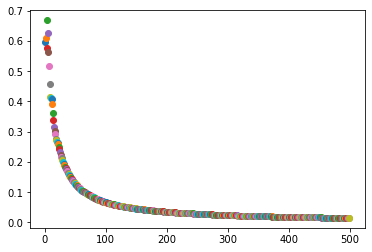

In [31]:
# Plotting 500 data points with learning rate 0.05
centers_sequential, optimal_weights_sequential = SGD(500, 0.05)

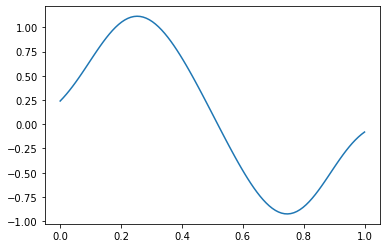

In [29]:
# Test the learned model on an independent test set
M = 20
testing_set_sequential = np.linspace(0,1,100)

testing_sequential_design_matrix_list = compute_design_matrix(centers_sequential, testing_set, M)
testing_sequential_design_matrix = np.array(testing_sequential_design_matrix_list)
sequential_learned_model_testing = learned_model(testing_sequential_design_matrix, optimal_weights_sequential)

# Plot the learned model
plt.plot(testing_set_sequential, sequential_learned_model_testing)

As can be seen from the figures above, the error converges, indicating that SGD has converged to the final weights 

(500,)


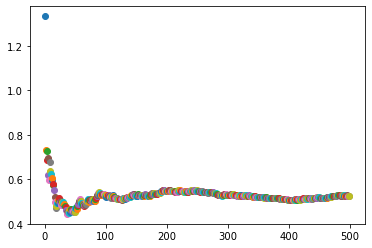

In [52]:
centers_sequential, optimal_weights_sequential = SGD(500, .00005)

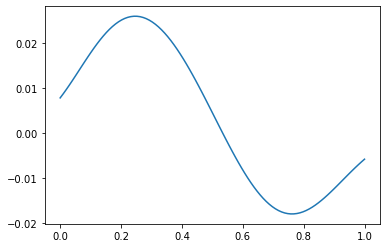

In [53]:
testing_set_sequential = np.linspace(0,1,100)

testing_sequential_design_matrix_list = compute_design_matrix(centers_sequential, testing_set, M)
testing_sequential_design_matrix = np.array(testing_sequential_design_matrix_list)
sequential_learned_model_testing = learned_model(testing_sequential_design_matrix, optimal_weights_sequential)

# Plot the learned model
plt.plot(testing_set_sequential, sequential_learned_model_testing)

As can be seen, using a very small learning rate to converge more slowly. 

(100,)


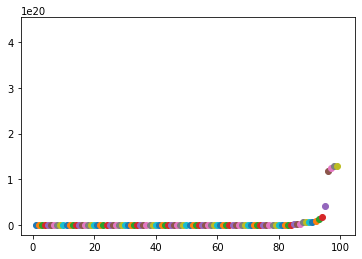

In [58]:
centers_sequential, optimal_weights_sequential = SGD(100, 1)

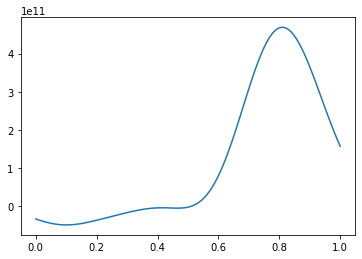

In [59]:
testing_set_sequential = np.linspace(0,1,100)

testing_sequential_design_matrix_list = compute_design_matrix(centers_sequential, testing_set, M)
testing_sequential_design_matrix = np.array(testing_sequential_design_matrix_list)
sequential_learned_model_testing = learned_model(testing_sequential_design_matrix, optimal_weights_sequential)

# Plot the learned model
plt.plot(testing_set_sequential, sequential_learned_model_testing)

As can be seen, using a very large value for the learning rate causes the error to not converge at all